# Exploring Udemy Course

Author: Aashi Pandey 

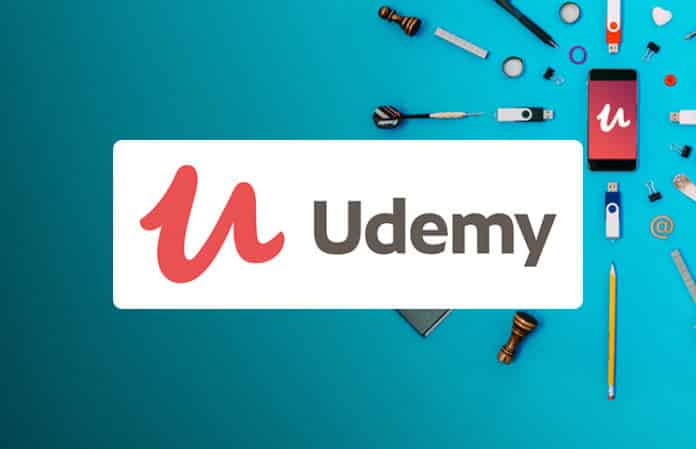

In [235]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" 
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
import pandas as pd
import bqplot
import datetime as dt 

%matplotlib inline

The data represents the information about the various courses taught by Udemy which is an online learning and teaching marketplace. It gives larger picture of what subjects or industry Udemy has most courses and there subscribers, course_id etc.
I have created mainly two views in my dashboard.

Data Exploration View

Interactive Chart View

Apart from these views I have created some charts such as Bar plot to show total number of lectures for specific subject, Scatter plot to show relationship between content duration and number of lectures.
You can find the dataset here- Kaggle-
https://www.kaggle.com/andrewmvd/udemy-courses


Hope you like it!!


In [211]:
#reading the dataset
udemy_data = pd.read_csv('udemy_courses.csv', 
                    dayfirst=True, sep=',')

In [212]:
udemy_data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [219]:
heat_data = udemy_data.groupby('subject')['num_lectures'].sum()
heat_data


subject
Business Finance       38755
Graphic Design         19329
Musical Instruments    26055
Web Development        63381
Name: num_lectures, dtype: int64

**Data Exploration Dashboard**

In [229]:
##Data Exploration

##Dataset View
full_data = widgets.Output()
full_data.clear_output()
with full_data:
    print(udemy_data)

header_output = widgets.Output()
header_output.clear_output()
with header_output:
    print(udemy_data.head())


##Columns of Dataset
info_output = widgets.Output()
info_output.clear_output()
with info_output:
    print(udemy_data.info())

##Unique Values in Dataset
options_dropdown = widgets.Dropdown(options = udemy_data.columns, description = "Column - ")
unique_output = widgets.Output()

def options_dropdown_eventhandler(change):
  unique_output.clear_output()
  ot = udemy_data[change.new].unique()
  with unique_output:
    display(ot)

options_dropdown.observe(options_dropdown_eventhandler, names='value')
dashboard_unique = widgets.VBox([options_dropdown, unique_output])

##Graph b/w categorical and numeric data
graph = widgets.Output()
dropdown_c1 = widgets.Dropdown(options = udemy_data[['course_id','course_title','is_paid','level','subject']], description = "Variable 1")
dropdown_c2 = widgets.Dropdown(options = udemy_data[['num_subscribers','num_reviews', 'num_lectures', 'price','content_duration']], description = "Variable 2")

def common(x='subject', y = 'num_reviews'):
  graph.clear_output()
  gf = udemy_data.plot(x=x, y=y, style='o')
  with graph:
    display(gf)

def dropdown_c1_eventhandler(change):
    common(change.new, dropdown_c2.value)
def dropdown_c2_eventhandler(change):
    common(dropdown_c1.value, change.new)

dropdown_c1.observe(dropdown_c1_eventhandler, names='value')
dropdown_c2.observe(dropdown_c2_eventhandler, names='value')

dashboard_graph = widgets.VBox([dropdown_c1, dropdown_c2, graph])

In [230]:
##Dashboard for data exploration
tab = widgets.Tab([full_data,header_output, info_output, dashboard_unique, dashboard_graph])
tab.set_title(0, 'Dataset')
tab.set_title(1, 'Columns of Dataset')
tab.set_title(2, 'Data Information')
tab.set_title(3, 'Unique values in column')
tab.set_title(4, 'Graph: categorical vs numeric')
display(tab)

In [231]:
#pivot Table
total_by_sub = pd.pivot_table(udemy_data, index = ["subject"], columns = ["level"], values = ["num_reviews"], aggfunc= np.sum)

total_by_sub

num_reviews                                               
level                All Levels Beginner Level Expert Level Intermediate Level
subject                                                                       
Business Finance          39736          28242         1167               6757
Graphic Design            19456          15784           57               1773
Musical Instruments       16787          10347          148               4442
Web Development          328318          74702          961              26044

**Interactive Charts Dashboard**

In [232]:
##FINAL
##Heat Map
# Scales
mySelectedLabel = widgets.Label() 
col_sc = bqplot.ColorScale(scheme = 'RdPu') # like x/y scale, but in "color space"
x_sc = bqplot.OrdinalScale() # ordered, categorical data, because our bins are more like categorical bins
y_sc = bqplot.OrdinalScale()

#creating list for the subject to be used as columns of our heat map
list_sub = total_by_sub.columns.levels[1].to_list()

#Marks
heat_map = bqplot.GridHeatMap(color=total_by_sub, scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
row = total_by_sub.index, column = list_sub,
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
color=np.log10(total_by_sub.values)

#Axis 
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'Level of course')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='subject of course')


i,j = 0,0
mask = (udemy_data['subject'] == total_by_sub.index[i]) & \
           (udemy_data['level'] == total_by_sub.columns.levels[1][j])
# new, subset dataframe
udemy_subset = udemy_data[mask]
# grab years and sqft from pandas
grouped = udemy_subset.groupby("subject")["num_reviews"].sum()
price = grouped.index
total_lectures = grouped.values
def get_data_value(change):
    i,j = change['owner'].selected[0]
    # grab buildings subset dataframe
    mask = (udemy_data['subject'] == total_by_sub.index[i]) & \
           (udemy_data['level'] == total_by_sub.columns.levels[1][j])
    udemy_subset = udemy_data[mask]
    # grab years and sqft from pandas
    grouped = udemy_subset.groupby("price")["num_lectures"].sum()
    price = grouped.index
    total_lectures = grouped.values
    barChart.x = price
    barChart.y = total_lectures
heat_map.observe(get_data_value, 'selected')
barChart = bqplot.Bars(x=price, y=total_lectures, scales={'x':x_sc, 'y':y_sc, 'color': col_sc},color_mode='group', stroke='orange')
# finally make a bar plot figure
fig_histogram = bqplot.Figure(marks=[barChart], axes=[x_ax,y_ax],title="Total number of reviews for selected subject in heat map")
fig_histogram

figure_heat_map = bqplot.Figure(marks=[heat_map], axes=[c_ax, x_ax, y_ax], title="Sum of Number of Lectures for selected Subject and Level")
figure_heat_map


Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Lev…

In [233]:
##FINAL
##Scatter Plot
#scales for bar plot plot

x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()
col_sc = bqplot.ColorScale(scheme='Reds')

#Axis for bar plot plot
x_axh = bqplot.Axis(scale=x_sch, label='Price of Course')
y_axh = bqplot.Axis(scale=y_sch, orientation='vertical', label='total Lectures for the course')

barChart = bqplot.Scatter(x=price, y=total_lectures, scales={'x':x_sch, 'y':y_sch, 'color': col_sc},color_mode='group', stroke='orange')
# finally make a bar plot figure
fig_histogram = bqplot.Figure(marks=[barChart], axes=[x_axh,y_axh],title="Sum of Number of lectures for selected subject in heat map")

fig_histogram

Figure(axes=[Axis(label='Price of Course', scale=LinearScale()), Axis(label='total Lectures for the course', o…

In [234]:
##FINAL
##Dashboard

figure_heat_map.layout.min_width = '500px'
fig_histogram.layout.min_width = '500px'
# side by side figures
figures = widgets.VBox([figure_heat_map, fig_histogram], title='dashbaord')

# label on top
myDashboard = widgets.VBox([mySelectedLabel, figures]) 
myDashboard

**DASHBOARD**

In [228]:
#DASHBOARD
from ipywidgets import Button, GridBox, Layout, ButtonStyle
header  = Button(description='Udemy Courses Dashboard',
                 layout=Layout(width='100%', grid_area='header'),
                 style=ButtonStyle(button_color='lightblue'))
main    = myDashboard

main2  = tab


plt.show()

GridBox(children=[header, main, main2],
        layout=Layout(
            width='100%',
            grid_template_rows='auto auto',
            grid_template_columns='50% 50%',
            grid_template_areas='''
            "header header header"
            "main . main2"
            "footer footer footer "
            ''')
       )

GridBox(children=(Button(description='Udemy Courses Dashboard', layout=Layout(grid_area='header', width='100%'…

About the dataset-

Udemy is an online teaching website where plethora online courses are available for public. Some courses are paid and some are unpaid. It is very famous website for certifications and online learning. 
The data represents the information about the various courses taught by Udemy which is an online learning and teaching marketplace. It gives larger picture of what subjects or industry Udemy has most courses and there subscribers, course_id etc.
Columns-
course_id (Integer)- It is the unique ID of the courses that helps identify the courses and other information directly.
course_title (String)- It is the name of the course as it appears on the website of Udemy.
url (String)- It is the unique url to the course.
is_paid price (Boolean)- It has True or False value ststing whether the course is paid or not.
num_subscribers (Integer) - It is total number of subscribers for the specific course.
num_reviews (Integer) - Its the number of reviews that particular course received.
num_lectures (Integer) - Number of lectures in particular course.
level (String) - It is categorical data that has 4 values, beginner, intermediate, expert, and all level.
content_duration (FLoat) - Number of hours.
published_timestamp (Date Time) - yyyy-mm-dd format with hours, minutes and Time Zone.
subject (String) - Name of subject that course covers.

Dataset Location-

Kaggle.
https://www.kaggle.com/andrewmvd/udemy-courses
The dataset is publicly available and have information till the year of 2019.

About the Dashboard and Charts- 

There are mainly 2 dashboards placed side by side. Both the views are interactive and enables user to explore data.

Data Exploration View-
First tab shows full dataset. Second tab shows the header that is columns of dataset. Third tab shows data type of each column in the dataset. Fourth Tab shows Unique Value of the selected variable in the dataset Fifth Tab makes graph between the two variables selected by user. I have Stored categorical data in Variable 1 and Numeric Data in Variable 2 so that the Scatter plot gets plotted and there is clear understanding for the user. When the user selects both the columns from the drop down, the scatter plot is created to give understanding between different categorical data (qualitative data) and quantitative data (numeric data).

Interactive Chart View-

The second View that I have created is a Heat Map that allows user to choose specific subject and level of course combination, on basis of which the Scatter Plot will be plotted. The Scatter plot shows total number of reviews V/s price of course for the combination selected in the Heat Map.
As you click on one block of heat map, it shows the number of lectures versus price for the combination chosen in the heat map. One can think of it as a pivot table where number of  is summed on the basis of subject and level of course
Apart from these views I have created some charts such as Bar plot to show total number of lectures for specific subject, Scatter plot to show relationship between content duration and number of lectures.
These all charts explore the dataset and can be helpful to make further decisions on the basis of the numbers on the charts.


Contextual Visualizations-
https://public.tableau.com/app/profile/murali.kembhavi/viz/UdemyCourseSummaryDashboard/Dashboard1

https://public.tableau.com/app/profile/toan.hoang/viz/TableauMagiconUdemy/TableauMagiconUdemy
 
Mainly these two contexual visualizations helped me to create the charts and views I wanted to show to audience using python. These are the Tableau dashboards and very well explains the datasets. 

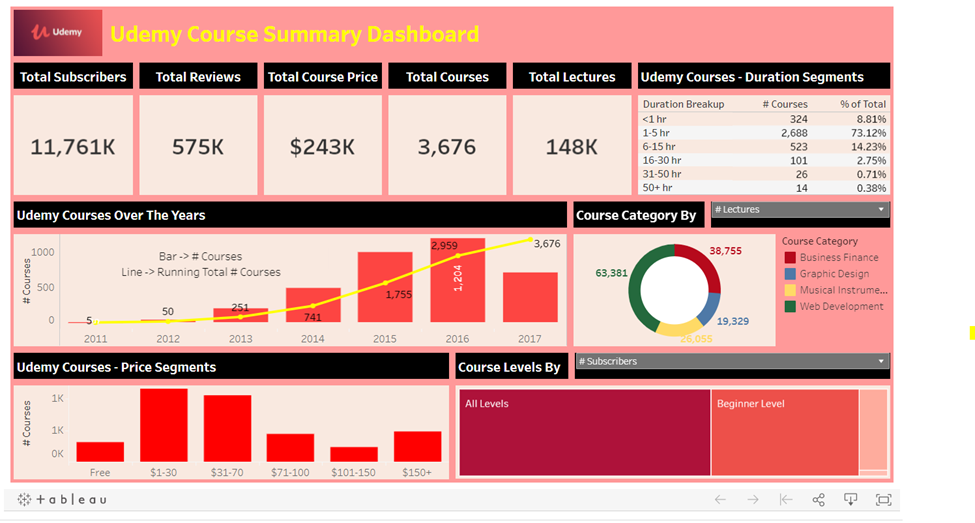

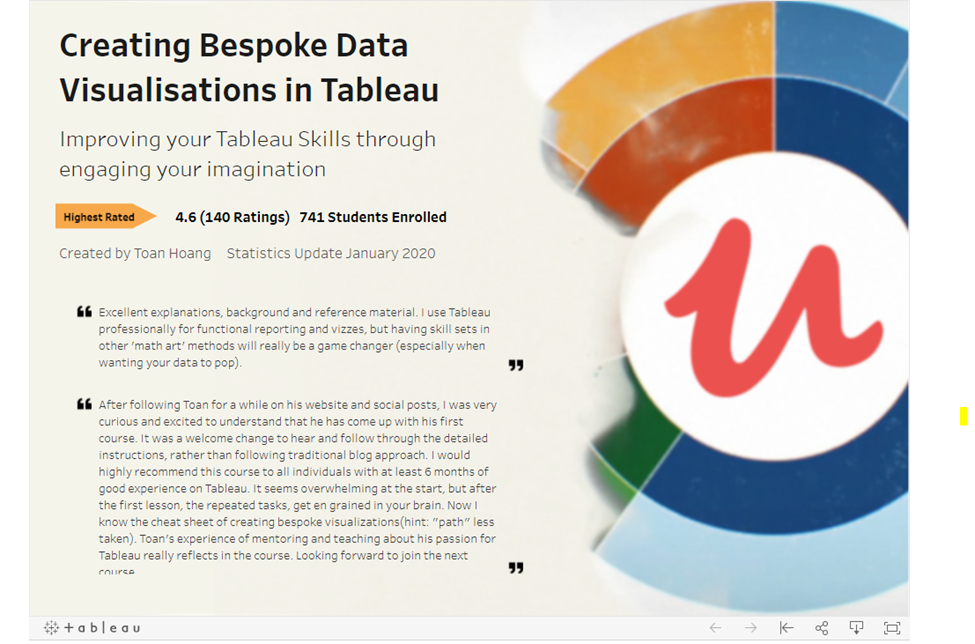

<AxesSubplot:xlabel='level'>

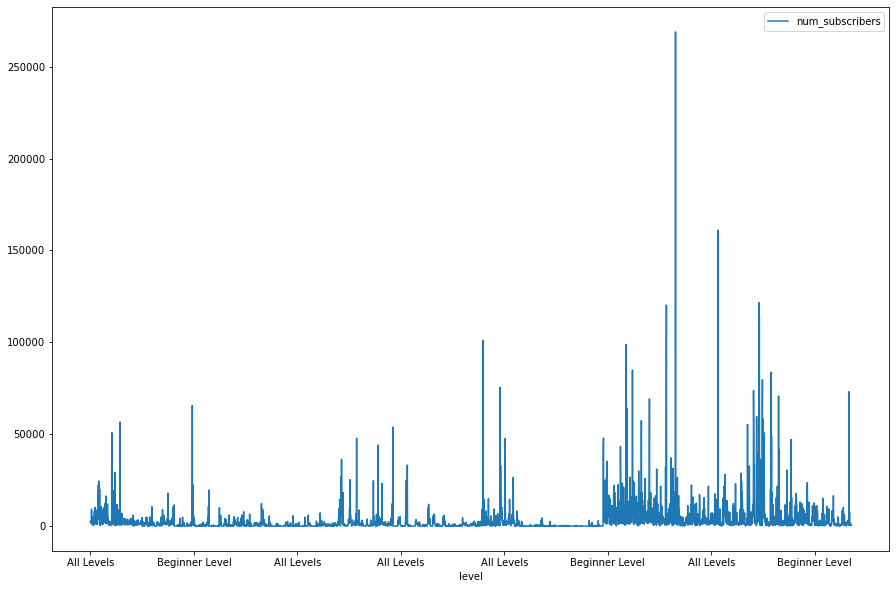

In [215]:
#simple chart to explore relationships in columns
udemy_data.plot(x="level", y="num_subscribers", figsize=(15,10))


**Bar Graph to showcase total number of subscribers for each subject category** 

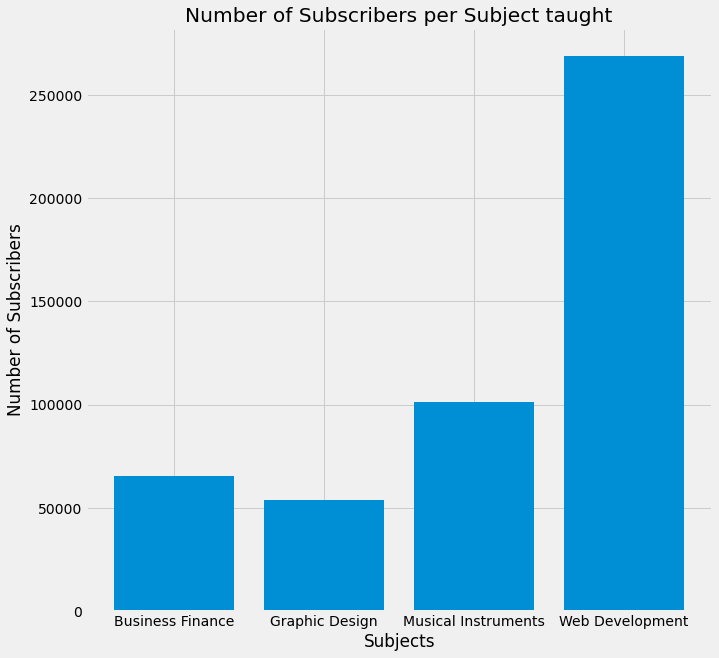

In [218]:
with plt.style.context('fivethirtyeight'): # this style is applied ONLY to this plot and not following
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.bar(udemy_data["subject"],udemy_data["num_subscribers"] )
    
    ax.set_xlabel("Subjects")
    ax.set_ylabel("Number of Subscribers")
    ax.set_title("Number of Subscribers per Subject taught")

Text(0.5, 1.0, 'Number of Subscribers per Subject taught')

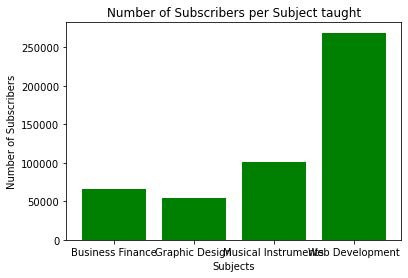

In [216]:
plt.bar(udemy_data["subject"], udemy_data["num_subscribers"], color='green')
plt.xlabel("Subjects")
plt.ylabel("Number of Subscribers")
plt.title("Number of Subscribers per Subject taught")
